<a href="https://colab.research.google.com/github/bayuryunarko/ML-in-Financial-Analysis/blob/main/01MLFinancialAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Changing Frequency

In [ ]:
pip install yfinance

In [3]:
# import lib
import pandas as pd
import numpy as np
import yfinance as yf

In [10]:
# download data
df = yf.download('AAPL', 
                       start= '2000-01-01',
                       end = '2010-12-31',
                       progress= False)

In [11]:
# keep only the adjusted close price
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [12]:
# calculate simple return
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

In [13]:
# remove redundant data
df.drop('adj_close', axis=1, inplace=True)
df.dropna(axis=0, inplace=True)

In [14]:
df.head()

,log_rtn
Date,
2000-01-04,-0.088077
2000-01-05,0.014527
2000-01-06,-0.090514
2000-01-07,0.046281
2000-01-10,-0.017744


In [15]:
# define the function for calculating the realized volatility
def realized_volatility(x):
  return np.sqrt(np.sum(x**2))

In [16]:
# calculate monthly realized volatility
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn':'rv'}, inplace=True)


In [18]:
df_rv

,rv
Date,
2000-01-31,0.818381
2000-02-29,0.512134
2000-03-31,0.843827
2000-04-30,0.736166
2000-05-31,0.640823
...,...
2010-08-31,0.208900
2010-09-30,0.228468
2010-10-31,0.241163


In [19]:
# Annualize the values:
df_rv.rv = df_rv.rv * np.sqrt(12)
df_rv

,rv
Date,
2000-01-31,2.834955
2000-02-29,1.774084
2000-03-31,2.923102
2000-04-30,2.550154
2000-05-31,2.219877
...,...
2010-08-31,0.723652
2010-09-30,0.791435
2010-10-31,0.835413


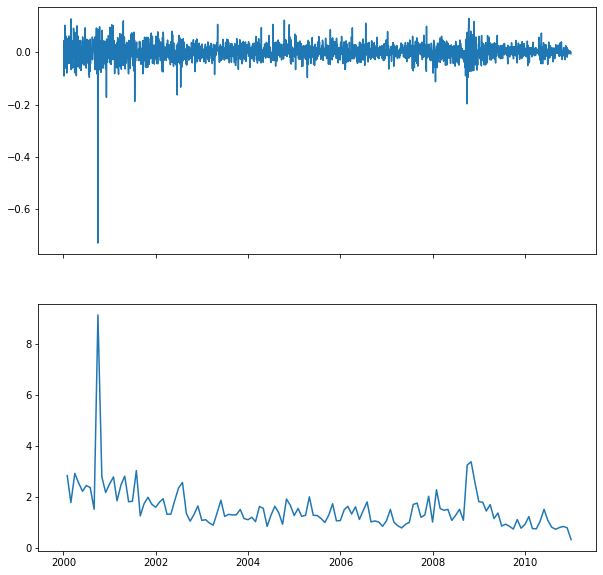

In [21]:
# plot result 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10,10))
ax[0].plot(df)
ax[1].plot(df_rv)

# plt.tight_layout()
plt.show()